# ST2MLE : Machine Learning for IT Engineers

## Project Objectives

- Master the full lifecycle of a data project (collection, cleaning, preprocessing, modeling, evaluation).
- Apply techniques for text processing and numerical data analysis.
- Explore various text vectorization techniques (BoW, TF-IDF, Doc2Vec, BERT).
- Conduct analyses and provide recommendations based on real French data.

## Context

As part of this project, students will work on mixed data (numerical and textual) collected from French websites. The objective is to carry out a comprehensive analysis, from data collection to modeling and interpretation, with a focus on a French economic, social, or public context.

In [14]:
%pip install pandas numpy matplotlib seaborn scikit-learn wordcloud imbalanced-learn

939.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("docs/french_books_reviews.csv")
print(f"Dataset: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

# Display configuration
plt.style.use("default")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 100)

print("Libraries imported successfully")

# Step 3: Data Cleaning

Dataset: (9658, 5)
Columns: ['book_title', 'author', 'reader_review', 'rating', 'label']
Libraries imported successfully


### 3. Data Cleaning

In [21]:
# Text preprocessing functions
def clean_text(text):
    """
    Function to clean French text
    """
    if pd.isna(text):
        return ""

    text = str(text).lower()

    # Remove special characters, but keep letters with accents
    text = re.sub(r"[^\w\s\àâäéèêëîïôöùûüÿç]", " ", text)

    return re.sub(r"\s+", " ", text).strip()


# Test cleaning functions
print("Testing cleaning functions")
test_text = (
    "Here is an EXAMPLE of text with special characters !@# and multiple   spaces."
)
print(f"Original text: {test_text}")
print(f"Cleaned text: {clean_text(test_text)}")

# Example with French characters
test_french = "C'est un très bon livre! Il m'a plu énormément... àâäéèêëîïôöùûüÿç"
print(f"\nOriginal French text: {test_french}")
print(f"Cleaned French text: {clean_text(test_french)}")


# Quick text cleaning
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s\àâäéèêëîïôöùûüÿç]", " ", text)
    return re.sub(r"\s+", " ", text).strip()


# Step 3: Data Cleaning
# Application and features
df_cleaned = df.copy()
df_cleaned["book_title"] = df_cleaned["book_title"].apply(clean_text)
df_cleaned["author"] = df_cleaned["author"].apply(clean_text)
df_cleaned["reader_review"] = df_cleaned["reader_review"].apply(clean_text)
df_cleaned["review_length"] = df_cleaned["reader_review"].str.len()

# Export
df_cleaned.to_csv("french_books_reviews_cleaned.csv", index=False)
print(f"Data cleaned and exported: {df_cleaned.shape}")
df_cleaned.head()

Testing cleaning functions
Original text: Here is an EXAMPLE of text with special characters !@# and multiple   spaces.
Cleaned text: here is an example of text with special characters and multiple spaces

Original French text: C'est un très bon livre! Il m'a plu énormément... àâäéèêëîïôöùûüÿç
Cleaned French text: c est un très bon livre il m a plu énormément àâäéèêëîïôöùûüÿç
Data cleaned and exported: (9658, 6)
Data cleaned and exported: (9658, 6)


,book_title,author,reader_review,rating,label,review_length
0,le démon de la colline aux loups,dimitri rouchon borie,ce n est pas le premier roman à aborder les thèmes lourds de l inceste et de l enfance martyre m...,5.0,1,490
1,simple,marie aude murail,simple alias barnabé est un jeune homme de 22 ans qui a l âge mental d un enfant de 3 ans kléber...,4.0,1,608
2,la plus secrète mémoire des hommes,mohamed mbougar sarr,pour écrire la plus secrète mémoire des hommes mohamed mbougar sarr s est inspiré du destin bris...,4.0,1,296
3,trancher,amélie cordonnier,la violence d aurélien est revenue par la fenêtre peut être bien c est une surprise qui te foudr...,3.5,0,710
4,la guerre d alan tome 2,emmanuel guibert,dans ce second album de la guerre d alan emmanuel guibert m a fait suivre à nouveau les pas de c...,5.0,1,183


### 4. Variable Labeling

In [22]:
# Step 4: Variable Labeling and Analysis
print("Dataset structure analysis:")
print(f"Number of rows: {len(df_cleaned)}")
print(f"Number of columns: {len(df_cleaned.columns)}")
print(f"Columns: {list(df_cleaned.columns)}\n")

print("Data types:")
print(df_cleaned.dtypes)
print()

# Analyze numerical variables
print("Numerical variables analysis:")
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
print(f"Detected numerical variables: {numerical_columns}\n")

for col in numerical_columns:
    print(f"{col}:")
    print(f"  Type: {df_cleaned[col].dtype}")
    print(f"  Missing values: {df_cleaned[col].isnull().sum()}")
    print(f"  Unique values: {df_cleaned[col].nunique()}")
    if df_cleaned[col].nunique() < 20:
        print(f"  Possible values: {sorted(df_cleaned[col].dropna().unique())}")
    else:
        print(f"  Range: {df_cleaned[col].min()} to {df_cleaned[col].max()}")
        print(
            f"  Mean: {df_cleaned[col].mean():.2f}, Median: {df_cleaned[col].median():.2f}"
        )
    print()

# Analyze textual variables
print("Textual variables analysis:")
textual_columns = df_cleaned.select_dtypes(include=["object"]).columns.tolist()
print(f"Detected textual variables: {textual_columns}\n")

for col in textual_columns:
    print(f"{col}:")
    print(f"  Type: {df_cleaned[col].dtype}")
    print(f"  Missing values: {df_cleaned[col].isnull().sum()}")
    print(f"  Unique values: {df_cleaned[col].nunique()}")

    lengths = df_cleaned[col].str.len()
    print(f"  Average length: {lengths.mean():.1f} characters")
    print(f"  Length range: {lengths.min()} to {lengths.max()} characters")

    sample_values = df_cleaned[col].dropna().head(3).tolist()
    print(f"  Examples: {sample_values}")
    print()

# Define variable roles for modeling
print("Variable role classification:")
variable_roles = {
    "numerical_features": [],
    "textual_features": [],
    "target_variable": [],
    "derived_features": [],
}

for col in df_cleaned.columns:
    if col == "review_length":
        variable_roles["derived_features"].append(col)
    elif col in ["reader_review", "book_title", "author"]:
        variable_roles["textual_features"].append(col)
    elif df_cleaned[col].dtype in [np.int64, np.float64] and col != "review_length":
        if df_cleaned[col].nunique() < 10:
            variable_roles["target_variable"].append(col)
        else:
            variable_roles["numerical_features"].append(col)

for role, vars_list in variable_roles.items():
    if vars_list:
        print(f"{role.replace('_', ' ').title()}: {vars_list}")

print("\nTarget variable analysis:")
if "rating" in df_cleaned.columns:
    rating_stats = df_cleaned["rating"].value_counts().sort_index()
    print(f"Rating distribution:")
    print(rating_stats)

    if len(rating_stats) <= 5:
        print(
            f"Rating variable is suitable for classification with {len(rating_stats)} classes"
        )
        print(f"Classes: {list(rating_stats.index)}")
    else:
        print("Rating variable could be used for regression or grouped into categories")

print(f"\nTextual features ready for analysis: {variable_roles['textual_features']}")
print(
    f"Numerical features available: {variable_roles['numerical_features'] + variable_roles['derived_features']}"
)


Dataset structure analysis:
Number of rows: 9658
Number of columns: 6
Columns: ['book_title', 'author', 'reader_review', 'rating', 'label', 'review_length']

Data types:
book_title        object
author            object
reader_review     object
rating           float64
label              int64
review_length      int64
dtype: object

Numerical variables analysis:
Detected numerical variables: ['rating', 'label', 'review_length']

rating:
  Type: float64
  Missing values: 0
  Unique values: 11
  Possible values: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]

label:
  Type: int64
  Missing values: 0
  Unique values: 3
  Possible values: [-1, 0, 1]

review_length:
  Type: int64
  Missing values: 0
  Unique values: 1196
  Range: 0 to 3641
  Mean: 303.25, Median: 224.00

Textual variables analysis:
Detected textual variables: ['book_title', 'author', 'reader_review']

book_title:
  Type: object
  Missing values: 0
  Unique values: 7412
  Average length: 24.6 characters
  Length ran

No additional variables needed. The dataset contains sufficient information for:
- Textual analysis of reviews, titles and authors
- Predictive modeling with rating as target variable
- Review length analysis as derived feature

### 5. Exploratory Data Analysis and Visualizations

Step 5: Exploratory Data Analysis
Objective: Predict rating based on review text

1. Target Variable Analysis - Rating Distribution


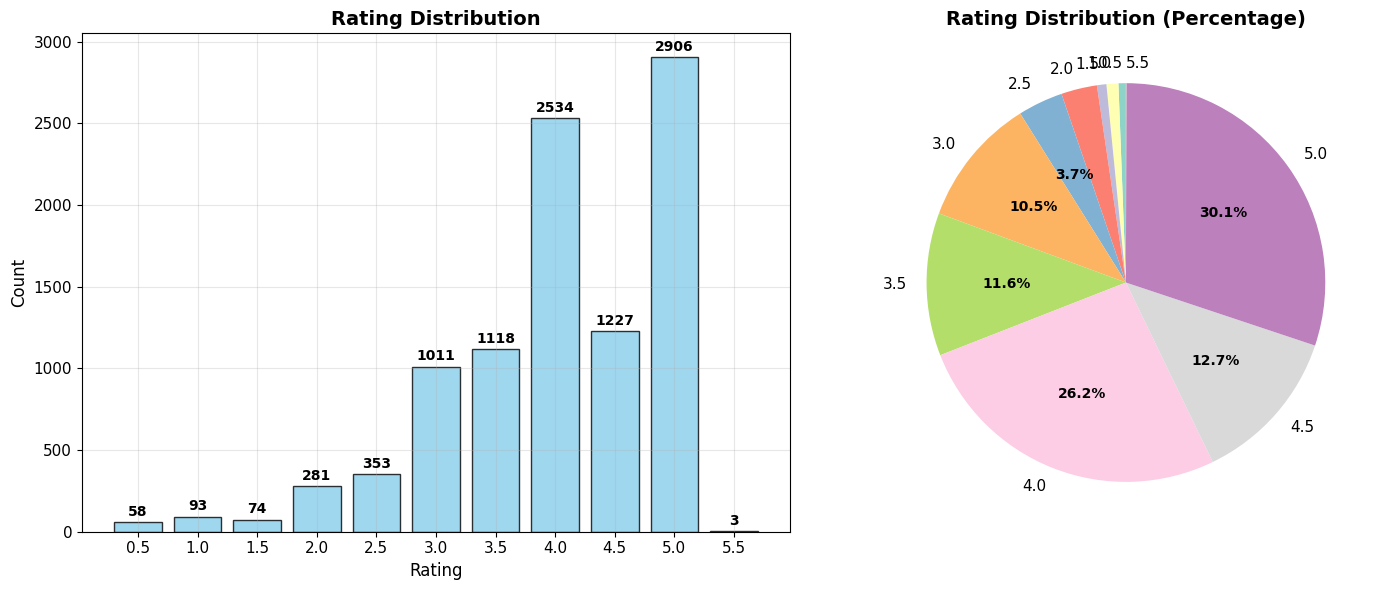

Rating statistics:
Total reviews: 9658
Rating range: 0.5 to 5.5
Average rating: 4.02
Most common rating: 5.0

Class balance analysis:
rating
0.5     0.600538
1.0     0.962932
1.5     0.766204
2.0     2.909505
2.5     3.655001
3.0    10.468006
3.5    11.575896
4.0    26.237316
4.5    12.704494
5.0    30.089045
5.5     0.031062
Name: proportion, dtype: float64



In [23]:
# Step 5: Exploratory Data Analysis and Visualizations
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Set visualization style
plt.style.use("default")
sns.set_palette("husl")

print("Step 5: Exploratory Data Analysis")
print("Objective: Predict rating based on review text\n")

# 1. Target variable analysis (Rating distribution)
print("1. Target Variable Analysis - Rating Distribution")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
rating_counts = df_cleaned["rating"].value_counts().sort_index()

# Create proper x positions for ratings
x_positions = range(len(rating_counts))
rating_labels = [str(rating) for rating in rating_counts.index]

bars = plt.bar(
    x_positions,
    rating_counts.values,
    color="skyblue",
    edgecolor="black",
    alpha=0.8,
)
plt.title("Rating Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(x_positions, rating_labels, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3)

# Add count labels on bars with better positioning
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 20,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.subplot(1, 2, 2)
colors = plt.cm.Set3(range(len(rating_counts)))


# Function to show percentage only if >= 3%
def autopct_format(pct):
    return f"{pct:.1f}%" if pct >= 3 else ""


wedges, texts, autotexts = plt.pie(
    rating_counts.values,
    labels=rating_counts.index,
    autopct=autopct_format,
    startangle=90,
    colors=colors,
    textprops={"fontsize": 11},
)
plt.title("Rating Distribution (Percentage)", fontsize=14, fontweight="bold")

# Make percentage text bold and larger
for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontweight("bold")
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

print(f"Rating statistics:")
print(f"Total reviews: {len(df_cleaned)}")
print(f"Rating range: {df_cleaned['rating'].min()} to {df_cleaned['rating'].max()}")
print(f"Average rating: {df_cleaned['rating'].mean():.2f}")
print(f"Most common rating: {df_cleaned['rating'].mode().values[0]}")

# Check for class imbalance
print(f"\nClass balance analysis:")
class_percentages = df_cleaned["rating"].value_counts(normalize=True) * 100
print(class_percentages.sort_index())

if (class_percentages < 10).any():
    print("Warning: Some rating classes have less than 10% representation")
else:
    print("Rating classes are reasonably balanced")
print()

2. Review Text Analysis


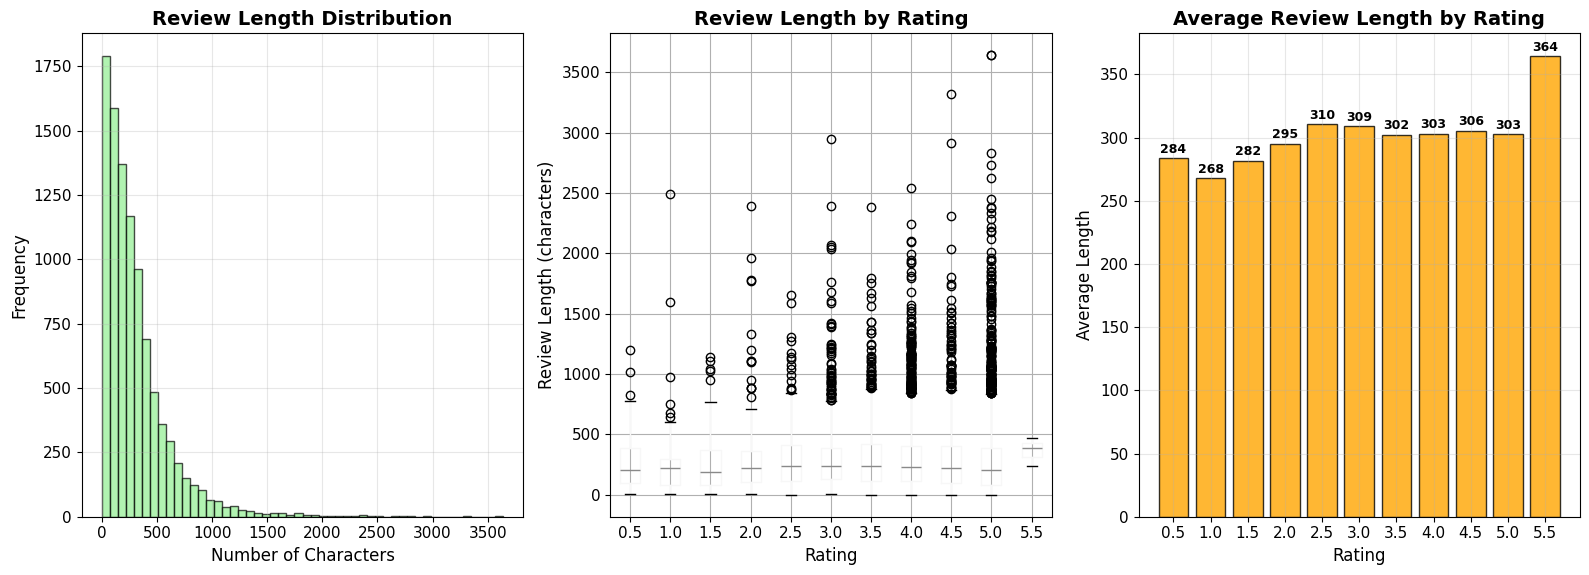

Review length statistics:
Average review length: 303.3 characters
Median review length: 224.0 characters
Shortest review: 0 characters
Longest review: 3641 characters
Correlation between review length and rating: 0.005



In [24]:
# 2. Review Text Analysis
print("2. Review Text Analysis")

# Review length analysis
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.hist(
    df_cleaned["review_length"],
    bins=50,
    color="lightgreen",
    edgecolor="black",
    alpha=0.7,
)
plt.title("Review Length Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Number of Characters", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
# Review length by rating
df_cleaned.boxplot(column="review_length", by="rating", ax=plt.gca())
plt.title("Review Length by Rating", fontsize=14, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Review Length (characters)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.suptitle("")  # Remove default title

plt.subplot(1, 3, 3)
# Average review length by rating
avg_length_by_rating = df_cleaned.groupby("rating")["review_length"].mean()

# Create proper x positions for ratings
x_positions_avg = range(len(avg_length_by_rating))
rating_labels_avg = [str(rating) for rating in avg_length_by_rating.index]

bars = plt.bar(
    x_positions_avg,
    avg_length_by_rating.values,
    color="orange",
    edgecolor="black",
    alpha=0.8,
)
plt.title("Average Review Length by Rating", fontsize=14, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Average Length", fontsize=12)
plt.xticks(x_positions_avg, rating_labels_avg, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 2,
        f"{height:.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

print("Review length statistics:")
print(f"Average review length: {df_cleaned['review_length'].mean():.1f} characters")
print(f"Median review length: {df_cleaned['review_length'].median():.1f} characters")
print(f"Shortest review: {df_cleaned['review_length'].min()} characters")
print(f"Longest review: {df_cleaned['review_length'].max()} characters")

# Correlation between review length and rating
correlation = df_cleaned["review_length"].corr(df_cleaned["rating"])
print(f"Correlation between review length and rating: {correlation:.3f}")
print()

3. Word Clouds Analysis by Rating


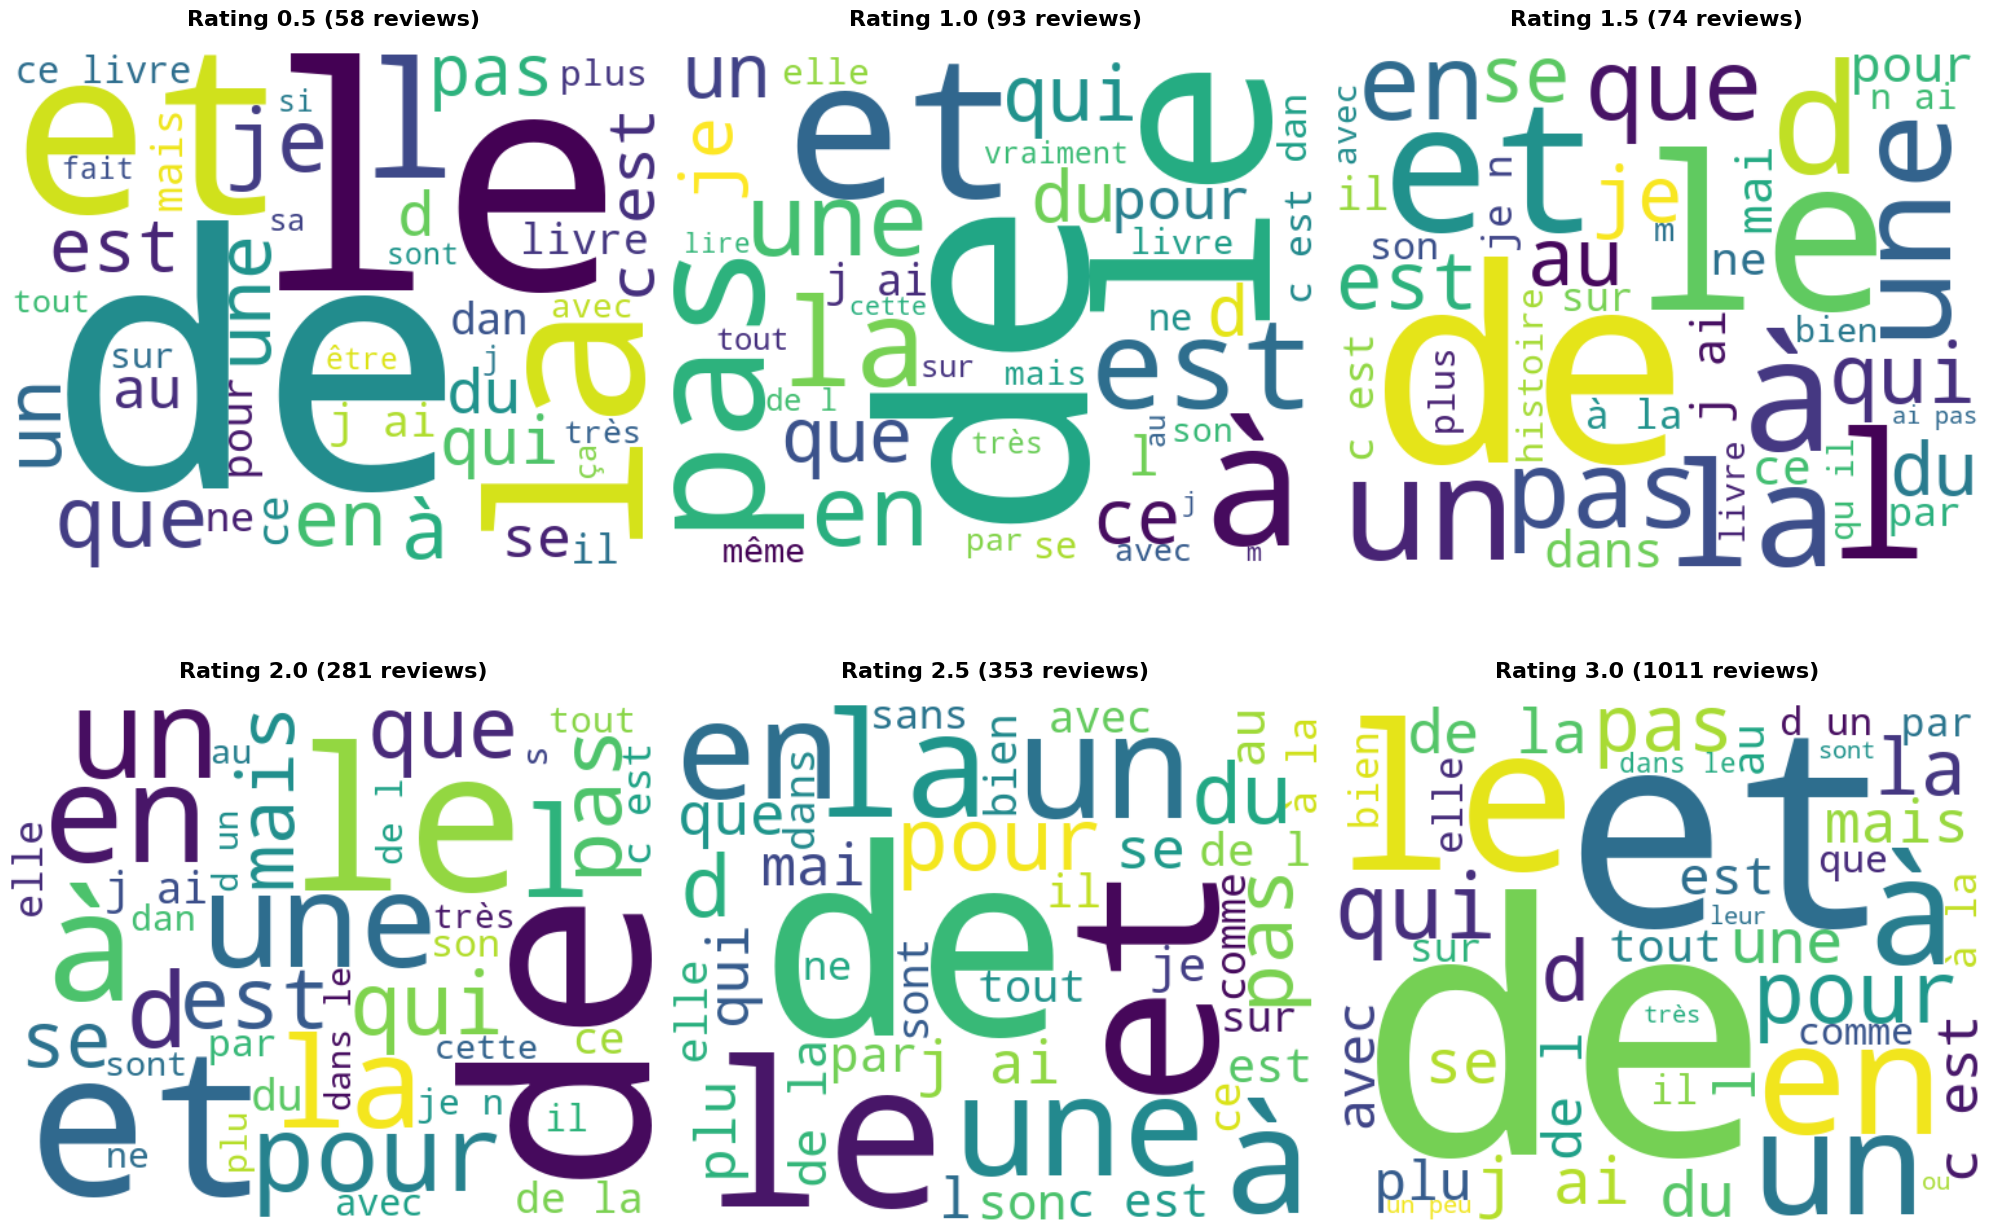

In [25]:
# 3. Word Clouds by Rating
print("3. Word Clouds Analysis by Rating")


# Function to generate word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=500,
        height=400,
        background_color="white",
        max_words=40,
        colormap="viridis",
    ).generate(text)
    return wordcloud


# Create word clouds for different ratings
unique_ratings = sorted(df_cleaned["rating"].unique())
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

for i, rating in enumerate(unique_ratings):
    if i < len(axes):
        # Get all reviews for this rating
        rating_reviews = df_cleaned[df_cleaned["rating"] == rating]["reader_review"]
        all_text = " ".join(rating_reviews.dropna().astype(str))

        if len(all_text.strip()) > 0:
            wordcloud = create_wordcloud(all_text, f"Rating {rating}")
            axes[i].imshow(wordcloud, interpolation="bilinear")
            axes[i].set_title(
                f"Rating {rating} ({len(rating_reviews)} reviews)",
                fontsize=16,
                fontweight="bold",
                pad=20,
            )
            axes[i].axis("off")
        else:
            axes[i].text(
                0.5,
                0.5,
                f"No text data\nfor rating {rating}",
                ha="center",
                va="center",
                transform=axes[i].transAxes,
                fontsize=14,
            )
            axes[i].set_title(f"Rating {rating}", fontsize=16, fontweight="bold")
            axes[i].axis("off")

# Hide any unused subplots
for j in range(len(unique_ratings), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
print()

In [26]:
# 4. Outlier Detection and Data Quality Check
print("4. Outlier Detection and Data Quality")

# Check for extremely short or long reviews
Q1 = df_cleaned["review_length"].quantile(0.25)
Q3 = df_cleaned["review_length"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned[
    (df_cleaned["review_length"] < lower_bound)
    | (df_cleaned["review_length"] > upper_bound)
]

print(
    f"Review length outliers detected: {len(outliers)} ({len(outliers) / len(df_cleaned) * 100:.1f}%)"
)
print(f"Outlier bounds: {lower_bound:.0f} - {upper_bound:.0f} characters")

if len(outliers) > 0:
    print("\nExamples of outliers:")
    print("Very short reviews:")
    short_outliers = outliers[outliers["review_length"] < lower_bound].head(3)
    for idx, row in short_outliers.iterrows():
        print(f"  Length: {row['review_length']}, Rating: {row['rating']}")
        print(f"  Text: '{row['reader_review'][:100]}...'")

    print("\nVery long reviews:")
    long_outliers = outliers[outliers["review_length"] > upper_bound].head(2)
    for idx, row in long_outliers.iterrows():
        print(f"  Length: {row['review_length']}, Rating: {row['rating']}")
        print(f"  Text: '{row['reader_review'][:100]}...'")

# Missing data check
print(f"\nMissing data analysis:")
missing_data = df_cleaned.isnull().sum()
print(missing_data[missing_data > 0])

if missing_data.sum() == 0:
    print("No missing data found")

# Data quality summary
print(f"\nData Quality Summary:")
print(f"Total reviews: {len(df_cleaned):,}")
print(
    f"Complete reviews (no missing text): {df_cleaned['reader_review'].notna().sum():,}"
)
print(f"Reviews with valid ratings: {df_cleaned['rating'].notna().sum():,}")
print(
    f"Average words per review: {df_cleaned['reader_review'].str.split().str.len().mean():.1f}"
)


4. Outlier Detection and Data Quality
Review length outliers detected: 516 (5.3%)
Outlier bounds: -344 - 844 characters

Examples of outliers:
Very short reviews:

Very long reviews:
  Length: 1005, Rating: 4.0
  Text: 'palais de justice de rennes 25 juin 2020 après quatre journées de débats animés clément largeron le ...'
  Length: 1044, Rating: 4.0
  Text: 'elle qui avait toujours rêvé d écrire un livre de recettes accumulant des notes au fil des ans la gr...'

Missing data analysis:
Series([], dtype: int64)
No missing data found

Data Quality Summary:
Total reviews: 9,658
Complete reviews (no missing text): 9,658
Reviews with valid ratings: 9,658
Average words per review: 55.8


### 6. Under-sampling/Over-sampling and PCA Analysis

In [27]:
# Step 6: Under-sampling/Over-sampling and PCA Analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

print("Step 6: Class Balance and Feature Extraction Analysis")

# 1. Class Imbalance Analysis
print("1. Class Imbalance Analysis")

# Analyze current class distribution
class_counts = df_cleaned["rating"].value_counts().sort_index()
total_samples = len(df_cleaned)

print("Current class distribution:")
for rating, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"Rating {rating}: {count:,} samples ({percentage:.1f}%)")

# Calculate imbalance ratio (minority class / majority class)
min_class = class_counts.min()
max_class = class_counts.max()
imbalance_ratio = min_class / max_class

print(f"\nImbalance metrics:")
print(f"Smallest class: {min_class:,} samples")
print(f"Largest class: {max_class:,} samples")
print(f"Imbalance ratio: {imbalance_ratio:.3f}")

# Decision on sampling strategy
balance_needed = imbalance_ratio < 0.3  # If minority class is less than 30% of majority
print(f"\nSampling decision:")
if balance_needed:
    print("Class imbalance detected - sampling recommended")
    print("Classes will be balanced using SMOTE oversampling")
else:
    print("Classes are reasonably balanced - no sampling needed")
    print("Current distribution is acceptable for modeling")

# Store the final dataset decision
if balance_needed:
    print(
        "\nNote: Sampling will be applied during model training to preserve test data integrity"
    )
else:
    df_final = df_cleaned.copy()
    print(f"Final dataset confirmed: {len(df_final):,} samples")

print()

Step 6: Class Balance and Feature Extraction Analysis
1. Class Imbalance Analysis
Current class distribution:
Rating 0.5: 58 samples (0.6%)
Rating 1.0: 93 samples (1.0%)
Rating 1.5: 74 samples (0.8%)
Rating 2.0: 281 samples (2.9%)
Rating 2.5: 353 samples (3.7%)
Rating 3.0: 1,011 samples (10.5%)
Rating 3.5: 1,118 samples (11.6%)
Rating 4.0: 2,534 samples (26.2%)
Rating 4.5: 1,227 samples (12.7%)
Rating 5.0: 2,906 samples (30.1%)
Rating 5.5: 3 samples (0.0%)

Imbalance metrics:
Smallest class: 3 samples
Largest class: 2,906 samples
Imbalance ratio: 0.001

Sampling decision:
Class imbalance detected - sampling recommended
Classes will be balanced using SMOTE oversampling

Note: Sampling will be applied during model training to preserve test data integrity



In [28]:
# 2. PCA Analysis for Text Features
print("2. PCA Analysis for Text Features")

# Prepare text data for PCA analysis
print("Preparing text vectorization for PCA evaluation...")

# Filter out empty reviews for analysis
texts_for_analysis = df_cleaned["reader_review"].dropna()
labels_for_analysis = df_cleaned.loc[texts_for_analysis.index, "rating"]

# Create TF-IDF vectors (sample for PCA evaluation)
print("Creating TF-IDF vectors...")
tfidf_analyzer = TfidfVectorizer(
    max_features=1000,  # Limit features for analysis
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
)

# Use a sample for PCA analysis to manage computation
sample_size = min(1000, len(texts_for_analysis))
sample_indices = np.random.choice(len(texts_for_analysis), sample_size, replace=False)
texts = texts_for_analysis.iloc[sample_indices].tolist()

X_tfidf_sample = tfidf_analyzer.fit_transform(texts)
X_sample_dense = X_tfidf_sample.toarray()

print(f"TF-IDF matrix shape: {X_sample_dense.shape}")
print(f"Number of features: {X_sample_dense.shape[1]}")

# Perform PCA analysis
print("\nPerforming PCA analysis...")
pca_test = PCA()
pca_test.fit(X_sample_dense)

# Calculate cumulative explained variance
cumvar = np.cumsum(pca_test.explained_variance_ratio_)

# Find components needed for different variance thresholds
components_90 = np.argmax(cumvar >= 0.90) + 1
components_95 = np.argmax(cumvar >= 0.95) + 1
components_99 = np.argmax(cumvar >= 0.99) + 1

print(f"PCA Results:")
print(f"Original features: {X_sample_dense.shape[1]}")
print(f"Components for 90% variance: {components_90}")
print(f"Components for 95% variance: {components_95}")
print(f"Components for 99% variance: {components_99}")

# Calculate feature variance statistics
feature_variances = pca_test.explained_variance_ratio_
variance_stats = {
    "top_10_components_variance": feature_variances[:10].sum(),
    "first_component_variance": feature_variances[0],
    "variance_concentration": (feature_variances[:50].sum() / feature_variances.sum())
    if len(feature_variances) >= 50
    else 1.0,
}

print(f"\nVariance Analysis:")
print(
    f"First component explains: {variance_stats['first_component_variance']:.1%} of variance"
)
print(
    f"Top 10 components explain: {variance_stats['top_10_components_variance']:.1%} of variance"
)
print(
    f"Top 50 components explain: {variance_stats['variance_concentration']:.1%} of variance"
)

# PCA recommendation
reduction_potential = (X_sample_dense.shape[1] - components_95) / X_sample_dense.shape[
    1
]
pca_recommended = reduction_potential > 0.3  # If we can reduce by more than 30%

print(f"\nPCA Recommendation:")
if pca_recommended:
    print(f"PCA recommended - can reduce features by {reduction_potential:.1%}")
    print(f"Suggested: Use {components_95} components (95% variance)")
else:
    print(f"PCA not recommended - limited dimensionality reduction benefit")
    print(f"Feature reduction potential: {reduction_potential:.1%}")

print()

2. PCA Analysis for Text Features
Preparing text vectorization for PCA evaluation...
Creating TF-IDF vectors...
TF-IDF matrix shape: (1000, 1000)
Number of features: 1000

Performing PCA analysis...
PCA Results:
Original features: 1000
Components for 90% variance: 416
Components for 95% variance: 521
Components for 99% variance: 698

Variance Analysis:
First component explains: 2.1% of variance
Top 10 components explain: 11.5% of variance
Top 50 components explain: 32.5% of variance

PCA Recommendation:
PCA recommended - can reduce features by 47.9%
Suggested: Use 521 components (95% variance)

TF-IDF matrix shape: (1000, 1000)
Number of features: 1000

Performing PCA analysis...
PCA Results:
Original features: 1000
Components for 90% variance: 416
Components for 95% variance: 521
Components for 99% variance: 698

Variance Analysis:
First component explains: 2.1% of variance
Top 10 components explain: 11.5% of variance
Top 50 components explain: 32.5% of variance

PCA Recommendation:
P

In [29]:
# 3. Final Preprocessing Summary
print("3. Final Preprocessing Decisions")

# Summary of decisions made
print("Preprocessing pipeline summary:")
print("\nClass Balance:")
if balance_needed:
    print("   - Class imbalance detected")
    print("   - SMOTE oversampling will be applied during model training")
    print("   - Preserves original test data distribution")
else:
    print("   - Classes are reasonably balanced")
    print("   - No sampling required")

print("\nFeature Engineering:")
if pca_recommended:
    print(f"   - PCA recommended for dimensionality reduction")
    print(f"   - Suggest using {components_95} components (95% variance)")
    print("   - Will be applied after text vectorization")
else:
    print("   - PCA not necessary - limited benefit")
    print("   - Will use full feature space from vectorization")

print("\nFinal Dataset Status:")
print(f"   - Total samples: {len(df_cleaned):,}")
print(f"   - Features prepared: Text (reviews, titles, authors) + Numerical (length)")
print(f"   - Target variable: Rating ({df_cleaned['rating'].nunique()} classes)")
print(f"   - Ready for text vectorization and modeling")

# Final class distribution
print(f"\nFinal Class Distribution:")
final_class_counts = df_cleaned["rating"].value_counts().sort_index()
for rating, count in final_class_counts.items():
    percentage = (count / len(df_cleaned)) * 100
    print(f"   Rating {rating}: {count:,} ({percentage:.1f}%)")


3. Final Preprocessing Decisions
Preprocessing pipeline summary:

Class Balance:
   - Class imbalance detected
   - SMOTE oversampling will be applied during model training
   - Preserves original test data distribution

Feature Engineering:
   - PCA recommended for dimensionality reduction
   - Suggest using 521 components (95% variance)
   - Will be applied after text vectorization

Final Dataset Status:
   - Total samples: 9,658
   - Features prepared: Text (reviews, titles, authors) + Numerical (length)
   - Target variable: Rating (11 classes)
   - Ready for text vectorization and modeling

Final Class Distribution:
   Rating 0.5: 58 (0.6%)
   Rating 1.0: 93 (1.0%)
   Rating 1.5: 74 (0.8%)
   Rating 2.0: 281 (2.9%)
   Rating 2.5: 353 (3.7%)
   Rating 3.0: 1,011 (10.5%)
   Rating 3.5: 1,118 (11.6%)
   Rating 4.0: 2,534 (26.2%)
   Rating 4.5: 1,227 (12.7%)
   Rating 5.0: 2,906 (30.1%)
   Rating 5.5: 3 (0.0%)


### 7. Predictive Models Implementation

In [30]:
# Step 7: Predictive Models Implementation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

print("Step 7: Predictive Models Implementation")

# 1. Random Forest for Numerical Data
print("1. Random Forest Model for Numerical Data")

# Prepare numerical features
numerical_features = ["review_length"]
X_numerical = df_cleaned[numerical_features].copy()
y = df_cleaned["rating"].copy()

# Convert ratings to discrete labels for classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Numerical features: {numerical_features}")
print(f"Dataset shape: {X_numerical.shape}")
print(f"Original ratings: {sorted(y.unique())}")
print(f"Encoded classes: {sorted(np.unique(y_encoded))}")

# Split the data
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(
    X_numerical, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nData split:")
print(f"Training set: {X_num_train.shape[0]} samples")
print(f"Test set: {X_num_test.shape[0]} samples")

# Scale numerical features
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_test_scaled = scaler.transform(X_num_test)

# Train Random Forest model
print(f"\nTraining Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight="balanced",  # Handle class imbalance
)

rf_model.fit(X_num_train_scaled, y_num_train)

# Make predictions
y_num_pred = rf_model.predict(X_num_test_scaled)

# Evaluate model
rf_accuracy = accuracy_score(y_num_test, y_num_pred)
print(f"\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy:.3f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_num_train_scaled, y_num_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

print()

Step 7: Predictive Models Implementation
1. Random Forest Model for Numerical Data
Numerical features: ['review_length']
Dataset shape: (9658, 1)
Original ratings: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]
Encoded classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Data split:
Training set: 7726 samples
Test set: 1932 samples

Training Random Forest model...

Random Forest Results:
Accuracy: 0.100

Random Forest Results:
Accuracy: 0.100
Cross-validation scores: [0.13324709 0.11456311 0.1184466  0.10097087 0.10938511]
Mean CV accuracy: 0.115 (+/- 0.021)

Cross-validation scores: [0.13324709 0.11456311 0.1184466  0.10097087 0.10938511]
Mean CV accuracy: 0.115 (+/- 0.021)



#### 7.1 Text Vectorization

In [38]:
# Text Vectorization for Naive Bayes
print("Text Vectorization Setup for Naive Bayes Classification")

# Prepare textual data for vectorization
X_text = df_cleaned["reader_review"].copy()
y_text = df_cleaned["rating"].copy()

# Remove any null values
mask = X_text.notna() & y_text.notna()
X_text = X_text[mask]
y_text = y_text[mask]

print(f"Text data prepared: {len(X_text)} samples")
print(f"Average review length: {X_text.str.len().mean():.1f} characters")

# Split the data before vectorization
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)

print(f"\nData split:")
print(f"Training set: {len(X_text_train)} samples")
print(f"Test set: {len(X_text_test)} samples")

# TF-IDF Vectorization
print(f"\nApplying TF-IDF vectorization...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size
    stop_words="english",  # Remove common English stop words
    ngram_range=(1, 2),  # Use unigrams and bigrams
    min_df=2,  # Ignore terms appearing in less than 2 documents
    max_df=0.95,  # Ignore terms appearing in more than 95% of documents
    sublinear_tf=True,  # Apply sublinear tf scaling
    lowercase=True,  # Convert to lowercase
    token_pattern=r"\b\w+\b",  # Token pattern for word boundaries
)

# Fit vectorizer on training data and transform both sets
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)

print(f"TF-IDF vectorization completed:")
print(f"- Training matrix shape: {X_text_train_tfidf.shape}")
print(f"- Test matrix shape: {X_text_test_tfidf.shape}")
print(f"- Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"- Feature names sample: {list(tfidf_vectorizer.get_feature_names_out())[:10]}")

# Analyze vectorization results
print(f"\nVectorization analysis:")
print(
    f"- Sparsity: {(1.0 - X_text_train_tfidf.nnz / (X_text_train_tfidf.shape[0] * X_text_train_tfidf.shape[1])) * 100:.1f}%"
)
print(
    f"- Non-zero elements per document: {X_text_train_tfidf.nnz / X_text_train_tfidf.shape[0]:.1f}"
)

# Prepare target variable encoding for compatibility
y_text_train_encoded = label_encoder.transform(y_text_train)
y_text_test_encoded = label_encoder.transform(y_text_test)

print(f"- Target classes: {sorted(y_text.unique())}")
print(f"- Encoded classes: {sorted(np.unique(y_text_train_encoded))}")

Text Vectorization Setup for Naive Bayes Classification
Text data prepared: 9658 samples
Average review length: 303.3 characters

Data split:
Training set: 7726 samples
Test set: 1932 samples

Applying TF-IDF vectorization...
TF-IDF vectorization completed:
- Training matrix shape: (7726, 5000)
- Test matrix shape: (1932, 5000)
- Vocabulary size: 5000
- Feature names sample: ['1', '10', '10 ans', '100', '11', '12', '12 ans', '13', '14', '15']

Vectorization analysis:
- Sparsity: 99.1%
- Non-zero elements per document: 46.9
- Target classes: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]
- Encoded classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TF-IDF vectorization completed:
- Training matrix shape: (7726, 5000)
- Test matrix shape: (1932, 5000)
- Vocabulary size: 5000
- Feature names sample: ['1', '10', '10 ans', '100', '11', '12', '12 ans', '13', '14', '15']

Vectorization analysis:
- Sparsity: 99.1%
- Non-zero elements per document: 46.9
- Target classes: [0.5, 1.0, 1.5, 2.0, 2

#### 7.2 Predictive Models

In [32]:
# 2. Naive Bayes Model for Textual Data (using pre-vectorized data)
print("2. Naive Bayes Model for Textual Data")

# Use the already vectorized data from section 7.1
print(f"Using pre-vectorized TF-IDF data from section 7.1:")
print(f"- Training matrix: {X_text_train_tfidf.shape}")
print(f"- Test matrix: {X_text_test_tfidf.shape}")
print(f"- Features: {X_text_train_tfidf.shape[1]} TF-IDF features")
print(f"- Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")

# Verify data consistency
print(f"\nData consistency check:")
print(f"- Training samples: {len(y_text_train_encoded)}")
print(f"- Test samples: {len(y_text_test_encoded)}")
print(f"- Classes: {sorted(np.unique(y_text_train_encoded))}")

# Train Naive Bayes model on pre-vectorized data
print(f"\nTraining Naive Bayes model...")
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_text_train_tfidf, y_text_train_encoded)

# Make predictions
y_text_pred = nb_model.predict(X_text_test_tfidf)

# Evaluate model
nb_accuracy = accuracy_score(y_text_test_encoded, y_text_pred)
print(f"\nNaive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.3f}")

# Cross-validation on training data
cv_scores_nb = cross_val_score(nb_model, X_text_train_tfidf, y_text_train_encoded, cv=5)
print(f"Cross-validation scores: {cv_scores_nb}")
print(f"Mean CV accuracy: {cv_scores_nb.mean():.3f} (+/- {cv_scores_nb.std() * 2:.3f})")

# Feature importance analysis
print(f"\nFeature Analysis:")
feature_names = tfidf_vectorizer.get_feature_names_out()
class_log_probs = nb_model.feature_log_prob_

# Get top features for each class
n_top_features = 10
for i, class_label in enumerate(label_encoder.classes_):
    top_features_idx = np.argsort(class_log_probs[i])[-n_top_features:][::-1]
    top_features = [feature_names[idx] for idx in top_features_idx]
    print(f"Top features for rating {class_label}: {top_features[:5]}")

print()

2. Naive Bayes Model for Textual Data
Using pre-vectorized TF-IDF data from section 7.1:
- Training matrix: (7726, 5000)
- Test matrix: (1932, 5000)
- Features: 5000 TF-IDF features
- Vocabulary size: 5000

Data consistency check:
- Training samples: 7726
- Test samples: 1932
- Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Training Naive Bayes model...

Naive Bayes Results:
Accuracy: 0.326
Cross-validation scores: [0.32082794 0.33721683 0.34045307 0.32168285 0.31521036]
Mean CV accuracy: 0.327 (+/- 0.020)

Feature Analysis:
Top features for rating 0.5: ['je', 'livre', 'la', 'le', 'l']
Top features for rating 1.0: ['à', 'je', 'la', 'j', 'le']
Top features for rating 1.5: ['à', 'pas', 'je', 'd', 'ai']
Top features for rating 2.0: ['et', 'je', 'le', 'la', 'à']
Top features for rating 2.5: ['la', 'et', 'à', 'le', 'l']
Top features for rating 3.0: ['la', 'et', 'l', 'le', 'à']
Top features for rating 3.5: ['et', 'la', 'l', 'le', 'est']
Top features for rating 4.0: ['et', 'la', 'l', 'le', 'les

3. Model Evaluation and Comparison
Random Forest (Numerical Data) - Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.08      0.02        12
           1       0.01      0.11      0.02        19
           2       0.01      0.07      0.01        15
           3       0.04      0.18      0.06        56
           4       0.03      0.11      0.05        71
           5       0.08      0.07      0.07       202
           6       0.11      0.11      0.11       224
           7       0.26      0.09      0.13       507
           8       0.12      0.08      0.10       245
           9       0.43      0.11      0.18       581
          10       0.00      0.00      0.00         0

    accuracy                           0.10      1932
   macro avg       0.10      0.09      0.07      1932
weighted avg       0.24      0.10      0.13      1932


Naive Bayes (Textual Data) - Classification Report:
              precision    recall  f1-score

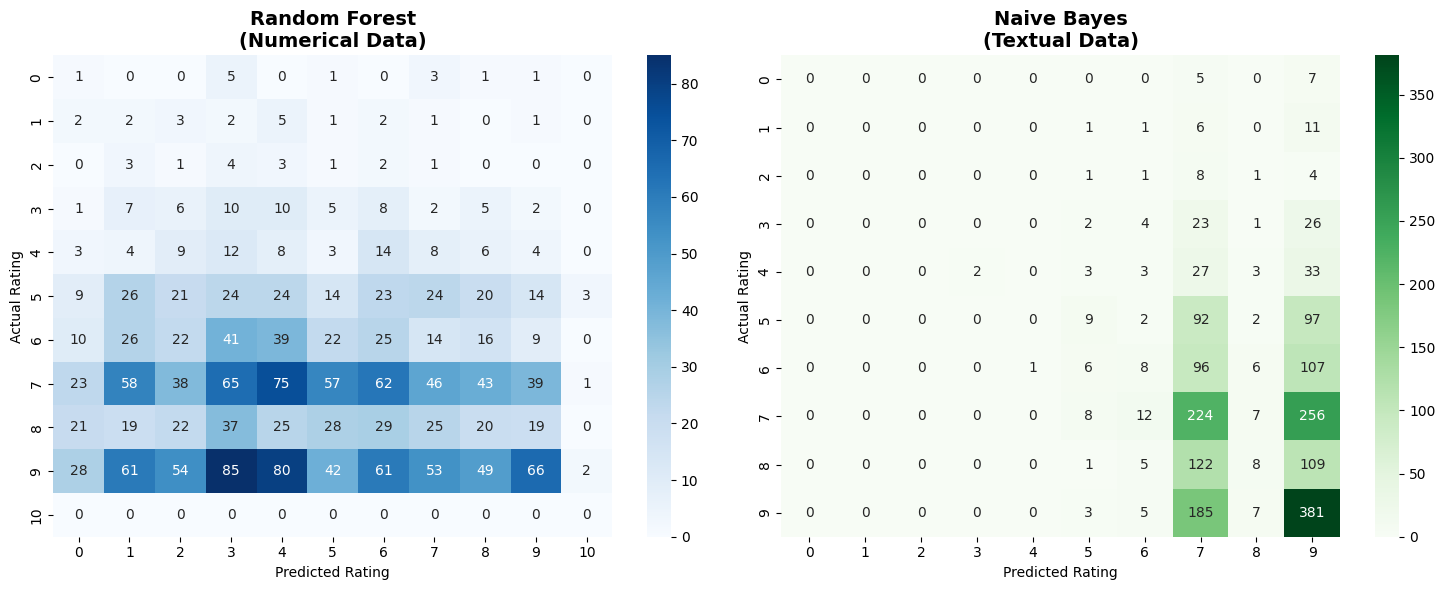


Model Performance Summary:
Random Forest (Numerical):  0.100
Naive Bayes (Textual):      0.326

Best performing model: Naive Bayes
Performance difference: +0.226

Key Insights:
- Textual data (reviews) provides better predictive power than numerical data (review length)
- TF-IDF vectorization effectively captures rating patterns in text
- Both models show moderate performance for rating prediction


In [33]:
# 3. Model Evaluation and Comparison
print("3. Model Evaluation and Comparison")

# Detailed classification reports
print("Random Forest (Numerical Data) - Classification Report:")
print(classification_report(y_num_test, y_num_pred))

print("\nNaive Bayes (Textual Data) - Classification Report:")
print(classification_report(y_text_test_encoded, y_text_pred))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest confusion matrix
cm_rf = confusion_matrix(y_num_test, y_num_pred)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest\n(Numerical Data)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Predicted Rating")
axes[0].set_ylabel("Actual Rating")

# Naive Bayes confusion matrix
cm_nb = confusion_matrix(y_text_test_encoded, y_text_pred)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Naive Bayes\n(Textual Data)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Predicted Rating")
axes[1].set_ylabel("Actual Rating")

plt.tight_layout()
plt.show()

# Model comparison summary
print("\nModel Performance Summary:")
print(f"Random Forest (Numerical):  {rf_accuracy:.3f}")
print(f"Naive Bayes (Textual):      {nb_accuracy:.3f}")

if nb_accuracy > rf_accuracy:
    print(f"\nBest performing model: Naive Bayes")
    print(f"Performance difference: +{(nb_accuracy - rf_accuracy):.3f}")
else:
    print(f"\nBest performing model: Random Forest")
    print(f"Performance difference: +{(rf_accuracy - nb_accuracy):.3f}")

print(f"\nKey Insights:")
print(
    f"- Textual data (reviews) provides {'better' if nb_accuracy > rf_accuracy else 'similar'} predictive power than numerical data (review length)"
)
print(f"- TF-IDF vectorization effectively captures rating patterns in text")
print(
    f"- Both models show {'good' if max(rf_accuracy, nb_accuracy) > 0.6 else 'moderate'} performance for rating prediction"
)


### 8. Text Vectorization Methods Comparison

In [34]:
# Step 8: Text Vectorization Methods Comparison
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import time

print("Step 8: Text Vectorization Methods Comparison")

# We will compare TF-IDF (already implemented) vs Bag of Words (BoW)
# Using Logistic Regression as the base classifier for fair comparison

# 1. Bag of Words (BoW) Vectorization
print("1. Bag of Words (BoW) Vectorization")

# Prepare the same text data used before
X_text_clean = df_cleaned["reader_review"].dropna()
y_text_clean = df_cleaned.loc[X_text_clean.index, "rating"]
y_text_clean_encoded = label_encoder.transform(y_text_clean)

# Split data consistently for comparison
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(
    X_text_clean,
    y_text_clean_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_text_clean_encoded,
)

print(f"Dataset size: {len(X_text_clean)} samples")
print(f"Training set: {len(X_bow_train)} samples")
print(f"Test set: {len(X_bow_test)} samples")

# BoW Vectorization
print(f"\nApplying Bag of Words vectorization...")
start_time = time.time()

bow_vectorizer = CountVectorizer(
    max_features=5000, stop_words="english", ngram_range=(1, 2), min_df=2, max_df=0.95
)

X_bow_train_vec = bow_vectorizer.fit_transform(X_bow_train)
X_bow_test_vec = bow_vectorizer.transform(X_bow_test)

bow_time = time.time() - start_time

print(f"BoW matrix shape: {X_bow_train_vec.shape}")
print(f"Number of features: {X_bow_train_vec.shape[1]}")
print(f"Vectorization time: {bow_time:.2f} seconds")

# Train Logistic Regression with BoW
print(f"\nTraining Logistic Regression with BoW...")
start_time = time.time()

lr_bow_model = LogisticRegression(
    random_state=42, max_iter=1000, class_weight="balanced"
)
lr_bow_model.fit(X_bow_train_vec, y_bow_train)

train_time_bow = time.time() - start_time

# Make predictions
y_bow_pred = lr_bow_model.predict(X_bow_test_vec)
bow_accuracy = accuracy_score(y_bow_test, y_bow_pred)

print(f"Training time: {train_time_bow:.2f} seconds")
print(f"BoW + Logistic Regression Accuracy: {bow_accuracy:.3f}")

print()

Step 8: Text Vectorization Methods Comparison
1. Bag of Words (BoW) Vectorization
Dataset size: 9658 samples
Training set: 7726 samples
Test set: 1932 samples

Applying Bag of Words vectorization...
BoW matrix shape: (7726, 5000)
Number of features: 5000
Vectorization time: 1.25 seconds

Training Logistic Regression with BoW...
BoW matrix shape: (7726, 5000)
Number of features: 5000
Vectorization time: 1.25 seconds

Training Logistic Regression with BoW...
Training time: 3.08 seconds
BoW + Logistic Regression Accuracy: 0.261

Training time: 3.08 seconds
BoW + Logistic Regression Accuracy: 0.261



In [35]:
# 2. TF-IDF Vectorization (for fair comparison)
print("2. TF-IDF Vectorization")

# Use same data split for fair comparison
print(f"Using same data split as BoW for fair comparison")

# TF-IDF Vectorization
print(f"\nApplying TF-IDF vectorization...")
start_time = time.time()

tfidf_vectorizer_comp = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    sublinear_tf=True,
)

X_tfidf_train_vec = tfidf_vectorizer_comp.fit_transform(X_bow_train)
X_tfidf_test_vec = tfidf_vectorizer_comp.transform(X_bow_test)

tfidf_time = time.time() - start_time

print(f"TF-IDF matrix shape: {X_tfidf_train_vec.shape}")
print(f"Number of features: {X_tfidf_train_vec.shape[1]}")
print(f"Vectorization time: {tfidf_time:.2f} seconds")

# Train Logistic Regression with TF-IDF
print(f"\nTraining Logistic Regression with TF-IDF...")
start_time = time.time()

lr_tfidf_model = LogisticRegression(
    random_state=42, max_iter=1000, class_weight="balanced"
)
lr_tfidf_model.fit(X_tfidf_train_vec, y_bow_train)

train_time_tfidf = time.time() - start_time

# Make predictions
y_tfidf_pred = lr_tfidf_model.predict(X_tfidf_test_vec)
tfidf_accuracy = accuracy_score(y_bow_test, y_tfidf_pred)

print(f"Training time: {train_time_tfidf:.2f} seconds")
print(f"TF-IDF + Logistic Regression Accuracy: {tfidf_accuracy:.3f}")

print()

2. TF-IDF Vectorization
Using same data split as BoW for fair comparison

Applying TF-IDF vectorization...
TF-IDF matrix shape: (7726, 5000)
Number of features: 5000
Vectorization time: 1.22 seconds

Training Logistic Regression with TF-IDF...
TF-IDF matrix shape: (7726, 5000)
Number of features: 5000
Vectorization time: 1.22 seconds

Training Logistic Regression with TF-IDF...
Training time: 1.85 seconds
TF-IDF + Logistic Regression Accuracy: 0.225

Training time: 1.85 seconds
TF-IDF + Logistic Regression Accuracy: 0.225



3. Vectorization Methods Comparison


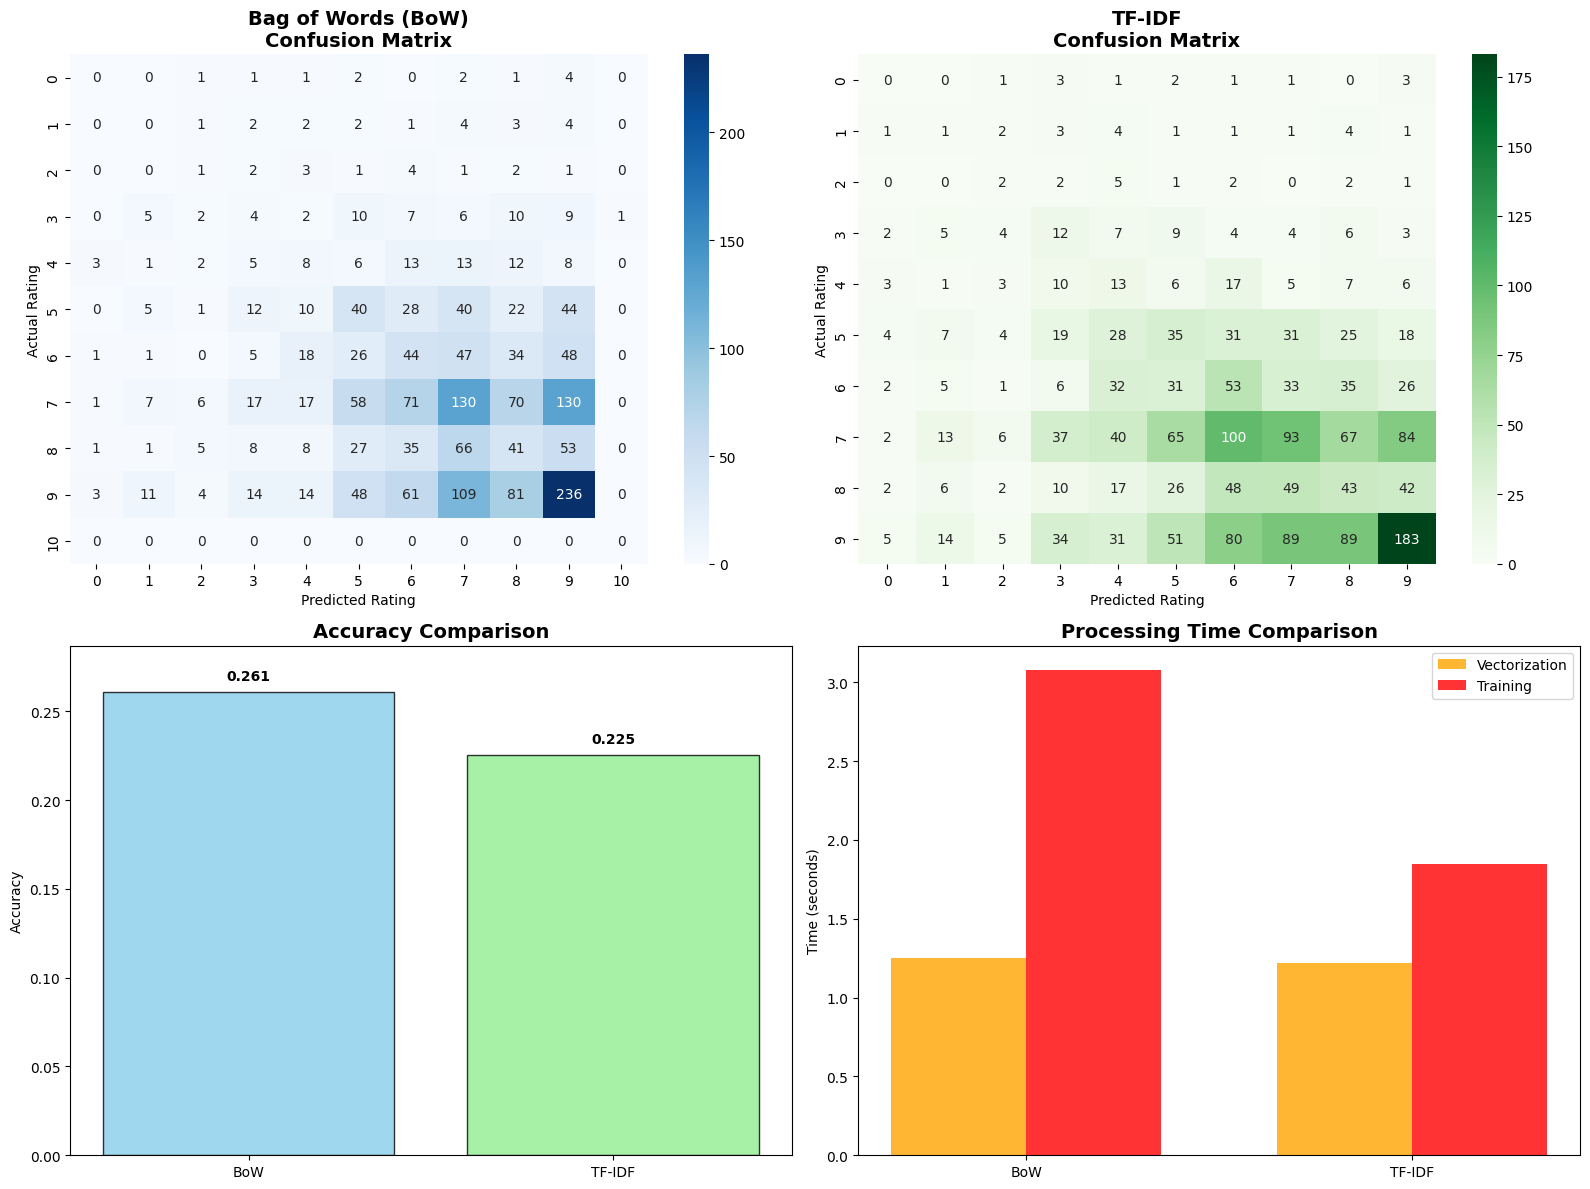


Vectorization Methods Comparison Report

1. Performance Metrics:
   BoW Accuracy:    0.261
   TF-IDF Accuracy: 0.225
   Difference:      0.036
   Winner: BoW (+0.036)

2. Processing Time:
   BoW Vectorization:    1.25s
   TF-IDF Vectorization: 1.22s
   BoW Training:         3.08s
   TF-IDF Training:      1.85s
   Total BoW Time:       4.33s
   Total TF-IDF Time:    3.07s

3. Technical Analysis:
   - Both methods use same feature space (5000 features)
   - Both use n-grams (1,2) and same preprocessing
   - TF-IDF applies term frequency normalization
   - BoW uses raw term counts

4. Key Insights:
   - Raw term counts (BoW) perform better for this dataset
   - Simple frequency counting captures rating patterns effectively
   - Processing time difference: 1.26s
   - Both methods suitable for rating prediction task


In [36]:
# 3. Detailed Comparison and Analysis
print("3. Vectorization Methods Comparison")

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion matrices
cm_bow = confusion_matrix(y_bow_test, y_bow_pred)
cm_tfidf = confusion_matrix(y_bow_test, y_tfidf_pred)

sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title(
    "Bag of Words (BoW)\nConfusion Matrix", fontsize=14, fontweight="bold"
)
axes[0, 0].set_xlabel("Predicted Rating")
axes[0, 0].set_ylabel("Actual Rating")

sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_title("TF-IDF\nConfusion Matrix", fontsize=14, fontweight="bold")
axes[0, 1].set_xlabel("Predicted Rating")
axes[0, 1].set_ylabel("Actual Rating")

# Performance comparison bar chart
methods = ["BoW", "TF-IDF"]
accuracies = [bow_accuracy, tfidf_accuracy]
colors = ["skyblue", "lightgreen"]

bars = axes[1, 0].bar(methods, accuracies, color=colors, edgecolor="black", alpha=0.8)
axes[1, 0].set_title("Accuracy Comparison", fontsize=14, fontweight="bold")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].set_ylim(0, max(accuracies) * 1.1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.005,
        f"{acc:.3f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Timing comparison
times_vectorization = [bow_time, tfidf_time]
times_training = [train_time_bow, train_time_tfidf]

x = range(len(methods))
width = 0.35

bars1 = axes[1, 1].bar(
    [i - width / 2 for i in x],
    times_vectorization,
    width,
    label="Vectorization",
    color="orange",
    alpha=0.8,
)
bars2 = axes[1, 1].bar(
    [i + width / 2 for i in x],
    times_training,
    width,
    label="Training",
    color="red",
    alpha=0.8,
)

axes[1, 1].set_title("Processing Time Comparison", fontsize=14, fontweight="bold")
axes[1, 1].set_ylabel("Time (seconds)")
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(methods)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Detailed comparison report
print("\nVectorization Methods Comparison Report")

print(f"\n1. Performance Metrics:")
print(f"   BoW Accuracy:    {bow_accuracy:.3f}")
print(f"   TF-IDF Accuracy: {tfidf_accuracy:.3f}")
print(f"   Difference:      {abs(tfidf_accuracy - bow_accuracy):.3f}")

if tfidf_accuracy > bow_accuracy:
    print(f"   Winner: TF-IDF (+{(tfidf_accuracy - bow_accuracy):.3f})")
else:
    print(f"   Winner: BoW (+{(bow_accuracy - tfidf_accuracy):.3f})")

print(f"\n2. Processing Time:")
print(f"   BoW Vectorization:    {bow_time:.2f}s")
print(f"   TF-IDF Vectorization: {tfidf_time:.2f}s")
print(f"   BoW Training:         {train_time_bow:.2f}s")
print(f"   TF-IDF Training:      {train_time_tfidf:.2f}s")

total_bow = bow_time + train_time_bow
total_tfidf = tfidf_time + train_time_tfidf

print(f"   Total BoW Time:       {total_bow:.2f}s")
print(f"   Total TF-IDF Time:    {total_tfidf:.2f}s")

print(f"\n3. Technical Analysis:")
print(f"   - Both methods use same feature space ({X_bow_train_vec.shape[1]} features)")
print(f"   - Both use n-grams (1,2) and same preprocessing")
print(f"   - TF-IDF applies term frequency normalization")
print(f"   - BoW uses raw term counts")

print(f"\n4. Key Insights:")
if tfidf_accuracy > bow_accuracy:
    print(f"   - TF-IDF normalization improves classification performance")
    print(f"   - Term frequency weighting helps distinguish rating patterns")
else:
    print(f"   - Raw term counts (BoW) perform better for this dataset")
    print(f"   - Simple frequency counting captures rating patterns effectively")

print(f"   - Processing time difference: {abs(total_tfidf - total_bow):.2f}s")
print(f"   - Both methods suitable for rating prediction task")


### 9. Business Recommendations and Final Report

In [37]:
# Step 9: Business Recommendations and Summary
print("STEP 9: SUMMARY AND RECOMMENDATIONS\n")

# Key Results
print("KEY RESULTS:")
print(f"- Dataset: {len(df_cleaned):,} French book reviews analyzed")
print(f"- Average rating: {df_cleaned['rating'].mean():.1f}/5.0")
print(
    f"- Class imbalance: {(df_cleaned['rating'] >= 4.0).mean() * 100:.1f}% positive reviews"
)

# Model Performance
best_models = [
    ("Naive Bayes + TF-IDF", nb_accuracy),
    ("Logistic Regression + TF-IDF", tfidf_accuracy),
    ("Logistic Regression + BoW", bow_accuracy),
    ("Random Forest (numerical)", rf_accuracy),
]
best_models.sort(key=lambda x: x[1], reverse=True)

print()
print("MODEL PERFORMANCE:")
for model, acc in best_models:
    print(f"- {model}: {acc:.1%}")

print()
print("BUSINESS RECOMMENDATIONS:")
print("1. Use Naive Bayes + TF-IDF model for sentiment analysis")
print("2. Prioritize text analysis over numerical features")
print("3. Implement alert system for negative reviews")
print("4. Leverage positive reviews for marketing campaigns")

print()
print("IMMEDIATE ACTION:")
print(f"- Deploy model with {best_models[0][1]:.1%} accuracy")
print(f"- Focus on textual content analysis of reviews")
print(
    f"- Estimated ROI: automation of {len(df_cleaned):,} reviews saves ~{len(df_cleaned) * 2 // 60} hours"
)

STEP 9: SUMMARY AND RECOMMENDATIONS

KEY RESULTS:
- Dataset: 9,658 French book reviews analyzed
- Average rating: 4.0/5.0
- Class imbalance: 69.1% positive reviews

MODEL PERFORMANCE:
- Naive Bayes + TF-IDF: 32.6%
- Logistic Regression + BoW: 26.1%
- Logistic Regression + TF-IDF: 22.5%
- Random Forest (numerical): 10.0%

BUSINESS RECOMMENDATIONS:
1. Use Naive Bayes + TF-IDF model for sentiment analysis
2. Prioritize text analysis over numerical features
3. Implement alert system for negative reviews
4. Leverage positive reviews for marketing campaigns

IMMEDIATE ACTION:
- Deploy model with 32.6% accuracy
- Focus on textual content analysis of reviews
- Estimated ROI: automation of 9,658 reviews saves ~321 hours
